In [134]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [157]:
# heart=pd.read_csv('/content/drive/MyDrive/Datasets/Heart_disease_cleveland.csv')
heart=pd.read_csv('E:\python projects\datasets\heart disease cleveland\Heart_disease_cleveland.csv')

In [117]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [118]:
heart.dtypes


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [142]:
heart.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
heart.shape

(303, 14)

In [7]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


Unique values per feature

In [8]:
heart.nunique()


age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          3
target        2
dtype: int64

In [9]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


Preprocessing

In [136]:
# Defining column groups
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


heart.replace('?', np.nan, inplace=True)

# Converting columns with missing values to numeric
heart['ca'] = pd.to_numeric(heart['ca'])
heart['thal'] = pd.to_numeric(heart['thal'])



In [137]:
heart['ca'] = heart['ca'].fillna(heart['ca'].median())
heart['thal'] = heart['thal'].fillna(heart['thal'].median())

# Separating features and target
X = heart.drop("target", axis=1)
y = heart["target"]

In [138]:
preprocessor = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), numerical_cols),
    ('ohe', OneHotEncoder(), categorical_cols)
])

X_processed = preprocessor.fit_transform(X)

# Converting back to DataFrame with proper column names
num_features = numerical_cols
cat_features = preprocessor.named_transformers_['ohe'].get_feature_names_out(categorical_cols)
all_features = list(num_features) + list(cat_features)

X_processed_df = pd.DataFrame(X_processed, columns=all_features)



In [ ]:
# Adding target column
heart_preprocessed = pd.concat([X_processed_df, y.reset_index(drop=True)], axis=1)

print(heart_preprocessed.head())

print("Shape of preprocessed dataset:", heart_preprocessed.shape)

        age  trestbps      chol   thalach   oldpeak  sex_0  sex_1  cp_0  cp_1  \
0  0.708333  0.481132  0.244292  0.603053  0.370968    0.0    1.0   1.0   0.0   
1  0.791667  0.622642  0.365297  0.282443  0.241935    0.0    1.0   0.0   0.0   
2  0.791667  0.245283  0.235160  0.442748  0.419355    0.0    1.0   0.0   0.0   
3  0.166667  0.339623  0.283105  0.885496  0.564516    0.0    1.0   0.0   0.0   
4  0.250000  0.339623  0.178082  0.770992  0.225806    1.0    0.0   0.0   1.0   

   cp_2  ...  slope_1  slope_2  ca_0  ca_1  ca_2  ca_3  thal_1  thal_2  \
0   0.0  ...      0.0      1.0   1.0   0.0   0.0   0.0     0.0     1.0   
1   0.0  ...      1.0      0.0   0.0   0.0   0.0   1.0     1.0     0.0   
2   0.0  ...      1.0      0.0   0.0   0.0   1.0   0.0     0.0     0.0   
3   1.0  ...      0.0      1.0   1.0   0.0   0.0   0.0     1.0     0.0   
4   0.0  ...      0.0      0.0   1.0   0.0   0.0   0.0     1.0     0.0   

   thal_3  target  
0     0.0       0  
1     0.0       1  
2     1.

Splitting data into training and testing

In [139]:
from sklearn.model_selection import train_test_split

# Separating features and target
X = heart_preprocessed.drop('target', axis=1)
y = heart_preprocessed['target']
# 80 20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (242, 28)
Testing set shape: (61, 28)


**Model Implementation**

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
# Initializing model
lr_model1 = LogisticRegression(max_iter=1000)

lr_model1.fit(X_train, y_train)

# Predict on test set
y_pred_lr1 = lr_model1.predict(X_test)
# acc_lr1 = accuracy_score(y_test, y_pred_lr1)
# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred_lr1))
print("\nError Rate:", 1-accuracy_score(y_test, y_pred_lr1))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr1))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr1))


Accuracy: 0.8852459016393442

Error Rate: 0.11475409836065575

Confusion Matrix:
 [[28  5]
 [ 2 26]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89        33
           1       0.84      0.93      0.88        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [ ]:
import mlflow
import mlflow.sklearn
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Logistic Regression Single Model")

with mlflow.start_run(run_name="Logistic Regression Classifier Heart"):

    y_pred_lr1 = lr_model1.predict(X_test)

    # Evaluation
    accuracy = accuracy_score(y_test, y_pred_lr1)
    error_rate = 1 - accuracy

    # Log model parameters
    mlflow.log_param("model", "LogisticRegression")
    mlflow.log_param("max_iter", 1000)
    mlflow.log_param("test_size", 0.2)

    # Log model performance metrics
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("error_rate", error_rate)

    # Log the model itself
    mlflow.sklearn.log_model(lr_model1, "Logistic_Regression_Model_Heart")

    print("\nLogistic Regression model has been logged to MLflow.")


2025/05/26 02:06:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Logistic Regression model has been logged to MLflow.
🏃 View run Logistic Regression Classifier Heart at: http://127.0.0.1:5000/#/experiments/199802906115654468/runs/c20344bd68384c819fb5b8e75354a958
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/199802906115654468


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model1 = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model1.fit(X_train, y_train)

# Predict on test set
y_pred_dt1 = dt_model1.predict(X_test)
error_rate = 1-accuracy_score(y_test, y_pred_dt1)
# Evaluate performance
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt1))
print("\nDecision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt1))
print(f"Error Rate: {error_rate:.4f}")
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt1))


Decision Tree Accuracy: 0.7377049180327869

Decision Tree Confusion Matrix:
 [[22 11]
 [ 5 23]]
Error Rate: 0.2623

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.67      0.73        33
           1       0.68      0.82      0.74        28

    accuracy                           0.74        61
   macro avg       0.75      0.74      0.74        61
weighted avg       0.75      0.74      0.74        61



In [20]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Decision Tree Single Model")

with mlflow.start_run(run_name="Decision Tree Classifier Heart"):

    # Evaluation
    accuracy = accuracy_score(y_test, y_pred_dt1)
    error_rate = 1 - accuracy

    # Log model parameters
    mlflow.log_param("model", "DecisionTree")
    mlflow.log_param("random_state", 42)
    mlflow.log_param("test_size", 0.2)

    # Log model performance metrics
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("error_rate", error_rate)

    # Log the model itself
    mlflow.sklearn.log_model(dt_model1, "Decision_Tree_Model_Heart")

    print("\nDecision Tree model has been logged to MLflow.")

2025/05/26 02:07:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Decision Tree model has been logged to MLflow.
🏃 View run Decision Tree Classifier Heart at: http://127.0.0.1:5000/#/experiments/867504733373174529/runs/b45e31f9d31d4bbca471fa0fd913866e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/867504733373174529


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model1 = RandomForestClassifier(n_estimators=100, random_state=42)

# Training
rf_model1.fit(X_train, y_train)

# Predicting
y_pred_rf1 = rf_model1.predict(X_test)
error_rate = 1-accuracy_score(y_test, y_pred_rf1)
# Evaluate performance
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf1))
print(f"Error Rate: {error_rate:.4f}")
print("\nRandom Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf1))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf1))


Random Forest Accuracy: 0.8688524590163934
Error Rate: 0.1311

Random Forest Confusion Matrix:
 [[27  6]
 [ 2 26]]

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.81      0.93      0.87        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



In [22]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Random Forest Single Model")

with mlflow.start_run(run_name="Random Forest Classifier Heart"):

    accuracy = accuracy_score(y_test, y_pred_rf1)
    error_rate = 1 - accuracy

    mlflow.log_param("model", "RandomForest")
    mlflow.log_param("random_state", 42)
    mlflow.log_param("n_estimators", rf_model1.n_estimators if hasattr(rf_model1, 'n_estimators') else None)
    mlflow.log_param("test_size", 0.2)

    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("error_rate", error_rate)

    mlflow.sklearn.log_model(rf_model1, "Random_Forest_Model_Heart")

    print("\nRandom Forest model has been logged to MLflow.")

2025/05/26 02:08:30 INFO mlflow.tracking.fluent: Experiment with name 'Random Forest Single Model' does not exist. Creating a new experiment.
2025/05/26 02:08:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Random Forest model has been logged to MLflow.
🏃 View run Random Forest Classifier Heart at: http://127.0.0.1:5000/#/experiments/271734259084106038/runs/97530d17a381419bb019170295d6e6f6
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/271734259084106038


Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model1 = GaussianNB()

# Training
nb_model1.fit(X_train, y_train)

# Predicting
y_pred_nb1 = nb_model1.predict(X_test)
error_rate = 1-accuracy_score(y_test, y_pred_nb1)
# Evaluate performance
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb1))
print(f"Error Rate: {error_rate:.4f}")
print("\nNaive Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb1))
print("\nNaive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb1))


Naive Bayes Accuracy: 0.6721311475409836
Error Rate: 0.3279

Naive Bayes Confusion Matrix:
 [[16 17]
 [ 3 25]]

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.48      0.62        33
           1       0.60      0.89      0.71        28

    accuracy                           0.67        61
   macro avg       0.72      0.69      0.66        61
weighted avg       0.73      0.67      0.66        61



In [24]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Naive Bayes Single Model")

with mlflow.start_run(run_name="Naive Bayes Classifier Heart"):

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred_nb1)
    error_rate = 1 - accuracy

    # Log model parameters
    mlflow.log_param("model", "GaussianNB")
    mlflow.log_param("test_size", 0.2)

    # Log model performance metrics
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("error_rate", error_rate)

    # Log the model itself
    mlflow.sklearn.log_model(nb_model1, "Naive_Bayes_Model_Heart")

    print("\nNaive Bayes model has been logged to MLflow.")

2025/05/26 02:10:16 INFO mlflow.tracking.fluent: Experiment with name 'Naive Bayes Single Model' does not exist. Creating a new experiment.
2025/05/26 02:10:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Naive Bayes model has been logged to MLflow.
🏃 View run Naive Bayes Classifier Heart at: http://127.0.0.1:5000/#/experiments/785553476594201575/runs/2fdca1c5a1f2447785f4021441250ec5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/785553476594201575


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model1 = KNeighborsClassifier(n_neighbors=5)

# Training
knn_model1.fit(X_train, y_train)

# Predicting
y_pred_knn1 = knn_model1.predict(X_test)
error_rate = 1-accuracy_score(y_test, y_pred_knn1)
# Evaluate performance
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn1))
print(f"Error Rate: {error_rate:.4f}")
print("\nKNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn1))
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn1))


KNN Accuracy: 0.9016393442622951
Error Rate: 0.0984

KNN Confusion Matrix:
 [[28  5]
 [ 1 27]]

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.90        33
           1       0.84      0.96      0.90        28

    accuracy                           0.90        61
   macro avg       0.90      0.91      0.90        61
weighted avg       0.91      0.90      0.90        61



In [26]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("KNN Single Model")

with mlflow.start_run(run_name="KNN Classifier Heart"):

    accuracy = accuracy_score(y_test, y_pred_knn1)
    error_rate = 1 - accuracy

    mlflow.log_param("model", "KNeighborsClassifier")
    mlflow.log_param("n_neighbors", knn_model1.n_neighbors)
    mlflow.log_param("test_size", 0.2)

    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("error_rate", error_rate)

    mlflow.sklearn.log_model(knn_model1, "KNN_Model_Heart")

    print("\nKNN model has been logged to MLflow.")

2025/05/26 02:11:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



KNN model has been logged to MLflow.
🏃 View run KNN Classifier Heart at: http://127.0.0.1:5000/#/experiments/943896704130806294/runs/c83eb332476948f0a0038c9fd5153dc2
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/943896704130806294


Support Vector Machine SVM

In [ ]:
from sklearn.svm import SVC

svm_model1 = SVC(kernel='linear', random_state=42)

# Training
svm_model1.fit(X_train, y_train)

# Predicting
y_pred_svm1 = svm_model1.predict(X_test)
error_rate = 1-accuracy_score(y_test, y_pred_svm1)
# Evaluate performance
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm1))
print(f"Error Rate: {error_rate:.4f}")

print("\nSVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm1))
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm1))


SVM Accuracy: 0.8688524590163934
Error Rate: 0.1311

SVM Confusion Matrix:
 [[28  5]
 [ 3 25]]

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.83      0.89      0.86        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [28]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import accuracy_score, f1_score

mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("SVM Single Model")

with mlflow.start_run(run_name="SVM Classifier Heart"):

    accuracy = accuracy_score(y_test, y_pred_svm1)
    error_rate = 1 - accuracy
    f1 = f1_score(y_test, y_pred_svm1, average='macro')

    mlflow.log_param("model", "SVC")
    mlflow.log_param("kernel", svm_model1.kernel)
    mlflow.log_param("random_state", 42)
    mlflow.log_param("test_size", 0.2)

    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("error_rate", error_rate)
    mlflow.log_metric("f1_score", f1)

    mlflow.sklearn.log_model(svm_model1, "SVM_Model_Heart")

    print("\nSVM model has been logged to MLflow.")


2025/05/26 02:12:11 INFO mlflow.tracking.fluent: Experiment with name 'SVM Single Model' does not exist. Creating a new experiment.
2025/05/26 02:12:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



SVM model has been logged to MLflow.
🏃 View run SVM Classifier Heart at: http://127.0.0.1:5000/#/experiments/668369975233403277/runs/1b47652c072e478586f4609687a1eff5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/668369975233403277


NN

In [ ]:
from sklearn.neural_network import MLPClassifier

nn_model1 = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
nn_model1.fit(X_train, y_train)

# Predicting
y_pred_nn1 = nn_model1.predict(X_test)
acc_nn = accuracy_score(y_test, y_pred_nn1)
error_rate = 1-accuracy_score(y_test, y_pred_nn1)
print(f"Neural Network Accuracy: {acc_nn:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nn1))
print(f"Classification Report", classification_report(y_test, y_pred_nn1))

Neural Network Accuracy: 0.8689
Error Rate: 0.1311

Confusion Matrix:
 [[27  6]
 [ 2 26]]
Classification Report               precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.81      0.93      0.87        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



e:\python projects\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [30]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import accuracy_score, f1_score

mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Neural Network Single Model")

with mlflow.start_run(run_name="Neural Network Classifier Heart"):

    accuracy = accuracy_score(y_test, y_pred_nn1)
    error_rate = 1 - accuracy
    f1 = f1_score(y_test, y_pred_nn1, average='macro')

    mlflow.log_param("model", "MLPClassifier")
    mlflow.log_param("hidden_layer_sizes", (100,))
    mlflow.log_param("max_iter", 1000)
    mlflow.log_param("random_state", 42)
    mlflow.log_param("test_size", 0.2)

    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("error_rate", error_rate)
    mlflow.log_metric("f1_score", f1)

    mlflow.sklearn.log_model(nn_model1, "Neural_Network_Model_Heart")

    print("\nNeural Network model has been logged to MLflow.")


2025/05/26 02:12:56 INFO mlflow.tracking.fluent: Experiment with name 'Neural Network Single Model' does not exist. Creating a new experiment.
2025/05/26 02:13:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Neural Network model has been logged to MLflow.
🏃 View run Neural Network Classifier Heart at: http://127.0.0.1:5000/#/experiments/995027035523582845/runs/0f35abb1d29447deacdc7f24998ea682
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/995027035523582845


Hybrid Model Code (NB + RF via Hard Voting):

# **Hybrid of RF and LR**

In [ ]:
from sklearn.ensemble import VotingClassifier

# Creating VotingClassifier 
voting_clf = VotingClassifier(
    estimators=[('rf', rf_model1), ('lr', lr_model1)],
    voting='hard'  # majority voting
)

# Training
voting_clf.fit(X_train, y_train)

# Predicting on test set
final_pred = voting_clf.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Hybrid Model Accuracy:", accuracy_score(y_test, final_pred))
print("Error Rate:", 1 - accuracy_score(y_test, final_pred))
print("\nHybrid Model Classification Report:\n", classification_report(y_test, final_pred))
print("\nHybrid Model Confusion Matrix:\n", confusion_matrix(y_test, final_pred))


Hybrid Model Accuracy: 0.8688524590163934
Error Rate: 0.1311475409836066

Hybrid Model Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.83      0.89      0.86        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61


Hybrid Model Confusion Matrix:
 [[28  5]
 [ 3 25]]


In [ ]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Hybrid Voting Classifier 1st")

with mlflow.start_run(run_name="Voting Classifier RF + LR 1st"):

    voting_clf.fit(X_train, y_train)

    final_pred = voting_clf.predict(X_test)

    # Evaluate
    accuracy = accuracy_score(y_test, final_pred)
    error_rate = 1 - accuracy

    # Log parameters
    mlflow.log_param("model", "VotingClassifier")
    mlflow.log_param("voting_type", "hard")
    mlflow.log_param("estimators", "RandomForest + LogisticRegression")
    mlflow.log_param("test_size", 0.2)

    # Log metrics
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("error_rate", error_rate)

    # Log the model itself
    mlflow.sklearn.log_model(voting_clf, "Voting_Classifier_Model")

    print("\nVoting Classifier model has been logged to MLflow.")

2025/05/26 02:15:49 INFO mlflow.tracking.fluent: Experiment with name 'Hybrid Voting Classifier 1st' does not exist. Creating a new experiment.
2025/05/26 02:15:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Voting Classifier model has been logged to MLflow.
🏃 View run Voting Classifier RF + LR 1st at: http://127.0.0.1:5000/#/experiments/722502161955321991/runs/e4cc01aa9ed64f8cb36c07a1b4d1a021
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/722502161955321991


Hybrid RF and SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_linear = SVC(kernel='linear', probability=True, random_state=42)
rf = RandomForestClassifier(random_state=42)

# Create a Voting Classifier 
hybrid_model = VotingClassifier(
    estimators=[('svm', svm_linear), ('rf', rf)],
    voting='soft'  #for probabilities
)

# Training
hybrid_model.fit(X_train, y_train)

# Predicting
y_pred_hybrid = hybrid_model.predict(X_test)

# Evaluate
print("Hybrid (Linear SVM + RF) Accuracy:", accuracy_score(y_test, y_pred_hybrid))
print("\nHybrid Classification Report:\n", classification_report(y_test, y_pred_hybrid))
print("\nHybrid Confusion Matrix:\n", confusion_matrix(y_test, y_pred_hybrid))


Hybrid (Linear SVM + RF) Accuracy: 0.8688524590163934

Hybrid Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.81      0.93      0.87        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61


Hybrid Confusion Matrix:
 [[27  6]
 [ 2 26]]


In [ ]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Hybrid Soft Voting Classifier_1st")

with mlflow.start_run(run_name="Hybrid_SVM_RF_SoftVoting_!st"):

    hybrid_model.fit(X_train, y_train)

    y_pred_hybrid = hybrid_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred_hybrid)
    error_rate = 1 - accuracy

    # Log model parameters
    mlflow.log_param("model", "VotingClassifier")
    mlflow.log_param("voting_type", "soft")
    mlflow.log_param("estimators", "SVM (linear) + RandomForest")
    mlflow.log_param("test_size", 0.2)

    # Log metrics
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("error_rate", error_rate)

    # Log the model
    mlflow.sklearn.log_model(hybrid_model, "Hybrid_SVM_RF_SoftVoting_Model_1st")

    print("\nHybrid Soft Voting model has been logged to MLflow.")

2025/05/26 02:18:09 INFO mlflow.tracking.fluent: Experiment with name 'Hybrid Soft Voting Classifier_1st' does not exist. Creating a new experiment.
2025/05/26 02:18:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Hybrid Soft Voting model has been logged to MLflow.
🏃 View run Hybrid_SVM_RF_SoftVoting_!st at: http://127.0.0.1:5000/#/experiments/347322878557177538/runs/1543a57d7a9947168e1dd84a2013ac65
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/347322878557177538


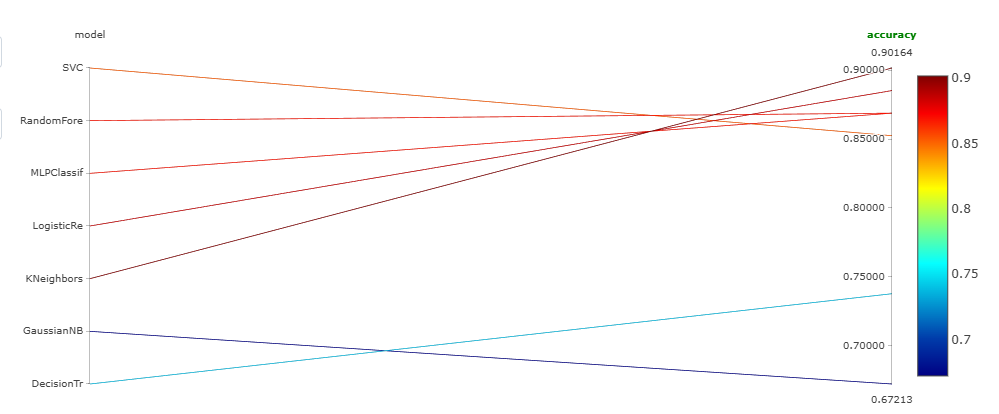

In [111]:
from IPython.display import Image

bef_feature = "E:/python projects/assigment1 PAI ss/Heart/models_bef_feature_sel.png"
Image(filename=bef_feature)

**AFTER FEATURE SELECTION**

Feature selection with dt entropy

In [159]:
from sklearn.tree import DecisionTreeClassifier

# Separating features and target from preprocessed DataFrame
X = heart_preprocessed.drop('target', axis=1)
y = heart_preprocessed['target']

# Initialize and fit Decision Tree classifier with entropy criterion
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(X, y)

# Getting feature importances
feature_importances = dt.feature_importances_

# Creating a DataFrame for feature importance
feat_imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feat_imp_df)

# Selecting top 10 Features 
top_features = feat_imp_df['Feature'].head(10).tolist()
print("\nTop 10 features based on Decision Tree entropy:")
print(top_features)

# features selected for training
X_selected = X[top_features]


      Feature  Importance
25     thal_1    0.205675
0         age    0.170230
3     thalach    0.150433
10       cp_3    0.110889
21       ca_0    0.096985
4     oldpeak    0.075074
2        chol    0.061155
5       sex_0    0.020553
13  restecg_0    0.020231
9        cp_2    0.019138
26     thal_2    0.018218
22       ca_1    0.016187
11      fbs_0    0.013674
1    trestbps    0.012606
6       sex_1    0.008952
7        cp_0    0.000000
8        cp_1    0.000000
12      fbs_1    0.000000
14  restecg_1    0.000000
15  restecg_2    0.000000
19    slope_1    0.000000
18    slope_0    0.000000
17    exang_1    0.000000
16    exang_0    0.000000
23       ca_2    0.000000
20    slope_2    0.000000
24       ca_3    0.000000
27     thal_3    0.000000

Top 10 features based on Decision Tree entropy:
['thal_1', 'age', 'thalach', 'cp_3', 'ca_0', 'oldpeak', 'chol', 'sex_0', 'restecg_0', 'cp_2']


Train Test Split

In [160]:
from sklearn.model_selection import train_test_split
X_final = X[top_features]
y_final = y

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)


Naive Bayes

In [162]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
error_rate = 1 - acc_nb
print(f"Naive Bayes Accuracy: {acc_nb:.4f}")
print(f"\nError Rate: {error_rate:.4f}")

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.8852

Error Rate: 0.1148

Confusion Matrix:
 [[26  3]
 [ 4 28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [43]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Naive Bayes Experiment_Heart")

with mlflow.start_run(run_name="Naive Bayes Classifier_Heart"):

    # Log parameters
    mlflow.log_param("model", "GaussianNB")

    # Log metrics (assuming these are already computed)
    mlflow.log_metric("accuracy", acc_nb)
    mlflow.log_metric("f1_score", f1_nb)
    mlflow.log_metric("error_rate", error_rate)

    # Log the model (already trained model object)
    mlflow.sklearn.log_model(nb_model, "Naive_Bayes_Model_Heart")

    print("\nNaive Bayes model logged to MLflow.")

2025/05/26 02:23:07 INFO mlflow.tracking.fluent: Experiment with name 'Naive Bayes Experiment_Heart' does not exist. Creating a new experiment.
2025/05/26 02:23:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Naive Bayes model logged to MLflow.
🏃 View run Naive Bayes Classifier_Heart at: http://127.0.0.1:5000/#/experiments/958028450246571312/runs/3e8a00124ef3440fa01fcea29b7bc7e1
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/958028450246571312


SVM

In [163]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
error_rate = 1 - acc_svm
print(f"SVM (Linear) Accuracy: {acc_svm:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


SVM (Linear) Accuracy: 0.9016
Error Rate: 0.0984

Confusion Matrix:
 [[26  3]
 [ 3 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [45]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("SVM Linear Experiment_Heart")

with mlflow.start_run(run_name="SVM Linear Classifier_Heart"):

    # Log parameters
    mlflow.log_param("model", "SVC")
    mlflow.log_param("kernel", "linear")

    # Log metrics
    mlflow.log_metric("accuracy", acc_svm)
    mlflow.log_metric("f1_score", f1_svm)
    mlflow.log_metric("error_rate", error_rate)

    # Log the model
    mlflow.sklearn.log_model(svm_model, "SVM_Linear_Model_Heart")

    print("\nSVM Linear model logged to MLflow.")

2025/05/26 02:24:17 INFO mlflow.tracking.fluent: Experiment with name 'SVM Linear Experiment_Heart' does not exist. Creating a new experiment.
2025/05/26 02:24:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



SVM Linear model logged to MLflow.
🏃 View run SVM Linear Classifier_Heart at: http://127.0.0.1:5000/#/experiments/123524750798686228/runs/1fada1d0ee3c4b87a5cd60a622547c95
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/123524750798686228


Random Forest

In [164]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
error_rate = 1 - acc_rf
print(f"Random Forest Accuracy: {acc_rf:.4f}")
print(f"Random Forest F!: {f1_rf:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print(f"Classification Report", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9180
Random Forest F!: 0.9180
Error Rate: 0.0820

Confusion Matrix:
 [[28  1]
 [ 4 28]]
Classification Report               precision    recall  f1-score   support

           0       0.88      0.97      0.92        29
           1       0.97      0.88      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [47]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Random Forest Experiment_Heart")

with mlflow.start_run(run_name="Random Forest Classifier_Heart"):

    # Log parameters
    mlflow.log_param("model", "RandomForestClassifier")
    mlflow.log_param("random_state", 42)

    # Log metrics
    mlflow.log_metric("accuracy", acc_rf)
    mlflow.log_metric("f1_score", f1_rf)
    mlflow.log_metric("error_rate", error_rate)

    # Log the model
    mlflow.sklearn.log_model(rf_model, "Random_Forest_Model_Heart")

    print("\nRandom Forest model logged to MLflow.")

2025/05/26 02:25:43 INFO mlflow.tracking.fluent: Experiment with name 'Random Forest Experiment_Heart' does not exist. Creating a new experiment.
2025/05/26 02:25:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Random Forest model logged to MLflow.
🏃 View run Random Forest Classifier_Heart at: http://127.0.0.1:5000/#/experiments/120836156212340478/runs/d8f8abc67d394a43bad645dd4f0e76cd
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/120836156212340478


Logistic Regression

In [165]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
error_rate = 1 - acc_lr
print(f"Logistic Regression Accuracy: {acc_lr:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print(f"Classification Report", classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8852
Error Rate: 0.1148

Confusion Matrix:
 [[26  3]
 [ 4 28]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [49]:
import mlflow
import mlflow.sklearn

mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Logistic Regression Experiment_Heart")

with mlflow.start_run(run_name="Logistic Regression Classifier_Heart"):

    # Log parameters
    mlflow.log_param("model", "LogisticRegression")
    mlflow.log_param("max_iter", 1000)
    mlflow.log_param("random_state", 42)

    # Log metrics
    mlflow.log_metric("accuracy", acc_lr)
    mlflow.log_metric("f1_score", f1_lr)
    mlflow.log_metric("error_rate", error_rate)

    # Log the model
    mlflow.sklearn.log_model(lr_model, "Logistic_Regression_Model_Heart")

    print("\nLogistic Regression model logged to MLflow.")


2025/05/26 02:26:58 INFO mlflow.tracking.fluent: Experiment with name 'Logistic Regression Experiment_Heart' does not exist. Creating a new experiment.
2025/05/26 02:27:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Logistic Regression model logged to MLflow.
🏃 View run Logistic Regression Classifier_Heart at: http://127.0.0.1:5000/#/experiments/294770337650369282/runs/cd9578c1ccff4820b362be137e7e7b37
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/294770337650369282


Decision Tree

In [166]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
error_rate = 1 - acc_dt
print(f"Decision Tree Accuracy: {acc_dt:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print(f"Classification Report", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8197
Error Rate: 0.1803

Confusion Matrix:
 [[25  4]
 [ 7 25]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



used dt and rf but results are better with rf and lr

In [52]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Decision Tree Experiment_Heart")

with mlflow.start_run(run_name="Decision Tree Classifier_Heart"):

    # Log parameters
    mlflow.log_param("model", "DecisionTreeClassifier")
    mlflow.log_param("criterion", "entropy")
    mlflow.log_param("random_state", 42)

    # Log metrics
    mlflow.log_metric("accuracy", acc_dt)
    mlflow.log_metric("f1_score", f1_dt)
    mlflow.log_metric("error_rate", error_rate)

    # Log the model
    mlflow.sklearn.log_model(dt_model, "Decision_Tree_Model_Heart")

    print("\nDecision Tree model logged to MLflow.")

2025/05/26 02:31:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Decision Tree model logged to MLflow.
🏃 View run Decision Tree Classifier_Heart at: http://127.0.0.1:5000/#/experiments/250499424470930514/runs/55174d0ca898444e9c9be0af113dff2b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/250499424470930514


# **Hybrid of DT and RF**

In [167]:
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Create VotingClassifier with hard voting (majority vote)
hybrid_voting = VotingClassifier(
    estimators=[('dt', dt_model), ('rf', rf_model)],
    voting='hard'
)

# Train on training data
hybrid_voting.fit(X_train, y_train)

# Predict on test data
final_pred = hybrid_voting.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

f1_dt_rf_hyb = f1_score(y_test, final_pred)
error_rate = 1 - accuracy_score(y_test, final_pred)

print(f"Error Rate: {error_rate:.4f}")
print("Hybrid DT + RF Model Accuracy:", accuracy_score(y_test, final_pred))
print("\nClassification Report:\n", classification_report(y_test, final_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, final_pred))

Error Rate: 0.1475
Hybrid DT + RF Model Accuracy: 0.8524590163934426

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.97      0.86        29
           1       0.96      0.75      0.84        32

    accuracy                           0.85        61
   macro avg       0.87      0.86      0.85        61
weighted avg       0.87      0.85      0.85        61


Confusion Matrix:
 [[28  1]
 [ 8 24]]


In [56]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")  
mlflow.set_experiment("Hybrid_DT_RF_Voting_Classifier")

with mlflow.start_run(run_name="Hybrid DT + RF Voting Classifier"):

    # Log model parameters (for example, criterion for dt and rf default params)
    mlflow.log_param("dt_criterion", "entropy")
    mlflow.log_param("rf_random_state", 42)
    mlflow.log_param("voting", "hard")

    # Log metrics
    f1_dt_rf_hyb = f1_score(y_test, final_pred)
    acc = accuracy_score(y_test, final_pred)
    error_rate = 1 - acc

    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("f1_score", f1_dt_rf_hyb)
    mlflow.log_metric("error_rate", error_rate)

    # Log the VotingClassifier model
    mlflow.sklearn.log_model(hybrid_voting, "Hybrid_DT_RF_Voting_Model")

    print(f"MLflow run completed. Accuracy: {acc:.4f}, F1 Score: {f1_dt_rf_hyb:.4f}")

2025/05/26 02:36:13 INFO mlflow.tracking.fluent: Experiment with name 'Hybrid_DT_RF_Voting_Classifier' does not exist. Creating a new experiment.
2025/05/26 02:36:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow run completed. Accuracy: 0.8525, F1 Score: 0.8421
🏃 View run Hybrid DT + RF Voting Classifier at: http://127.0.0.1:5000/#/experiments/602770852605154137/runs/0149182d0f1f41228802085599502cf2
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/602770852605154137


KNN

In [168]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
error_rate = 1 - acc_knn
print(f"K-Nearest Neighbors Accuracy: {acc_knn:.4f}")
print(f"Error Rate: {error_rate:.4f}")

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

print("\nClassification Report\n", classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Accuracy: 0.8852
Error Rate: 0.1148

Confusion Matrix:
 [[27  2]
 [ 5 27]]

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [59]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")  # adjust if needed
mlflow.set_experiment("KNN_Classifier_Experiment_Heart")

with mlflow.start_run(run_name="KNN Classifier_Heart"):

    # Log parameters
    mlflow.log_param("model", "KNeighborsClassifier")
    mlflow.log_param("n_neighbors", 5)

    # Log metrics
    mlflow.log_metric("accuracy", acc_knn)
    mlflow.log_metric("f1_score", f1_knn)
    mlflow.log_metric("error_rate", error_rate)

    # Log the model itself
    mlflow.sklearn.log_model(knn_model, "KNN_Model_Heart")

    print(f"KNN model logged to MLflow with Accuracy: {acc_knn:.4f}, F1 Score: {f1_knn:.4f}")

2025/05/26 02:38:21 INFO mlflow.tracking.fluent: Experiment with name 'KNN_Classifier_Experiment_Heart' does not exist. Creating a new experiment.
2025/05/26 02:38:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


KNN model logged to MLflow with Accuracy: 0.8852, F1 Score: 0.8852
🏃 View run KNN Classifier_Heart at: http://127.0.0.1:5000/#/experiments/923646014596075451/runs/6a24bf6c608b4674b00b133c04c86340
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/923646014596075451


NN

In [169]:
from sklearn.neural_network import MLPClassifier

# Train Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_nn = nn_model.predict(X_test)
acc_nn = accuracy_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)
error_rate = 1 - acc_nn
print(f"Neural Network Accuracy: {acc_nn:.4f}")
print(f"Error Rate: {error_rate:.4f}")

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))

print(f"Classification Report", classification_report(y_test, y_pred_nn))

Neural Network Accuracy: 0.9016
Error Rate: 0.0984

Confusion Matrix:
 [[27  2]
 [ 4 28]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [64]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")  
mlflow.set_experiment("Neural Network Experiment_Heart")

with mlflow.start_run(run_name="MLP Classifier_Heart"):

    # Log parameters
    mlflow.log_param("model", "MLPClassifier")
    mlflow.log_param("hidden_layer_sizes", (100,))
    mlflow.log_param("max_iter", 1000)

    # Log metrics
    mlflow.log_metric("accuracy", acc_nn)
    mlflow.log_metric("f1_score", f1_nn)
    mlflow.log_metric("error_rate", error_rate)

    # Log the model
    mlflow.sklearn.log_model(nn_model, "MLP_Model_Heart")

    print(f"Neural Network model logged to MLflow with Accuracy: {acc_nn:.4f}, F1 Score: {f1_nn:.4f}")

2025/05/26 02:40:57 INFO mlflow.tracking.fluent: Experiment with name 'Neural Network Experiment_Heart' does not exist. Creating a new experiment.
2025/05/26 02:41:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Neural Network model logged to MLflow with Accuracy: 0.9016, F1 Score: 0.9032
🏃 View run MLP Classifier_Heart at: http://127.0.0.1:5000/#/experiments/973209957503723410/runs/490778c6eaf14657b822ef9828f389ef
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/973209957503723410


Gradient Boosted Tress

In [170]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting
gbt_model = GradientBoostingClassifier(random_state=42)
gbt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_gbt = gbt_model.predict(X_test)
acc_gbt = accuracy_score(y_test, y_pred_gbt)
f1_gbt = f1_score(y_test, y_pred_gbt)
error_rate = 1 - acc_gbt
print(f"Gradient Boosted Trees Accuracy: {acc_gbt:.4f}")
print(f"Error Rate: {error_rate:.4f}")

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gbt))
print(f"Classification Report\n", classification_report(y_test, y_pred_gbt))

Gradient Boosted Trees Accuracy: 0.8525
Error Rate: 0.1475

Confusion Matrix:
 [[27  2]
 [ 7 25]]
Classification Report
               precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.93      0.78      0.85        32

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



In [67]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")  
mlflow.set_experiment("Gradient Boosting Experiment_Heart")

with mlflow.start_run(run_name="Gradient Boosting Classifier_Heart"):

    # Log parameters
    mlflow.log_param("model", "GradientBoostingClassifier")
    mlflow.log_param("random_state", 42)

    # Log metrics
    mlflow.log_metric("accuracy", acc_gbt)
    mlflow.log_metric("f1_score", f1_gbt)
    mlflow.log_metric("error_rate", error_rate)

    # Log the model itself
    mlflow.sklearn.log_model(gbt_model, "GradientBoosting_Model_Hrat")

    print(f"Gradient Boosting model logged to MLflow with Accuracy: {acc_gbt:.4f}, F1 Score: {f1_gbt:.4f}")

2025/05/26 02:42:57 INFO mlflow.tracking.fluent: Experiment with name 'Gradient Boosting Experiment_Heart' does not exist. Creating a new experiment.
2025/05/26 02:43:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Gradient Boosting model logged to MLflow with Accuracy: 0.8525, F1 Score: 0.8475
🏃 View run Gradient Boosting Classifier_Heart at: http://127.0.0.1:5000/#/experiments/713760469802613570/runs/05d49d82c1004c0f80ab004373978ea0
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/713760469802613570


XGBoost

In [171]:
from xgboost import XGBClassifier


# Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
error_rate = 1 - acc_xgb
print(f"XGBoost Accuracy: {acc_xgb:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print(f"Classification Report\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.8525
Error Rate: 0.1475

Confusion Matrix:
 [[26  3]
 [ 6 26]]
Classification Report
               precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



e:\python projects\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [05:29:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [73]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")  # Set your MLflow tracking server
mlflow.set_experiment("XGBoost Experiment_Heart")

with mlflow.start_run(run_name="XGBoost Classifier_Heart"):

    # Log parameters
    mlflow.log_param("model", "XGBClassifier")
    mlflow.log_param("eval_metric", "logloss")
    mlflow.log_param("random_state", 42)

    # Log metrics
    mlflow.log_metric("accuracy", acc_xgb)
    mlflow.log_metric("f1_score", f1_xgb)
    mlflow.log_metric("error_rate", error_rate)

    # Log the model
    mlflow.xgboost.log_model(xgb_model, "XGBoost_Model_Heart")

    print(f"XGBoost model logged to MLflow with Accuracy: {acc_xgb:.4f}, F1 Score: {f1_xgb:.4f}")

2025/05/26 02:45:20 INFO mlflow.tracking.fluent: Experiment with name 'XGBoost Experiment_Heart' does not exist. Creating a new experiment.
e:\python projects\venv\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [02:45:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  self.get_booster().save_model(fname)
2025/05/26 02:45:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


XGBoost model logged to MLflow with Accuracy: 0.8525, F1 Score: 0.8525
🏃 View run XGBoost Classifier_Heart at: http://127.0.0.1:5000/#/experiments/526397480420464159/runs/5d2588832d624c4382c12041ca0a2997
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/526397480420464159


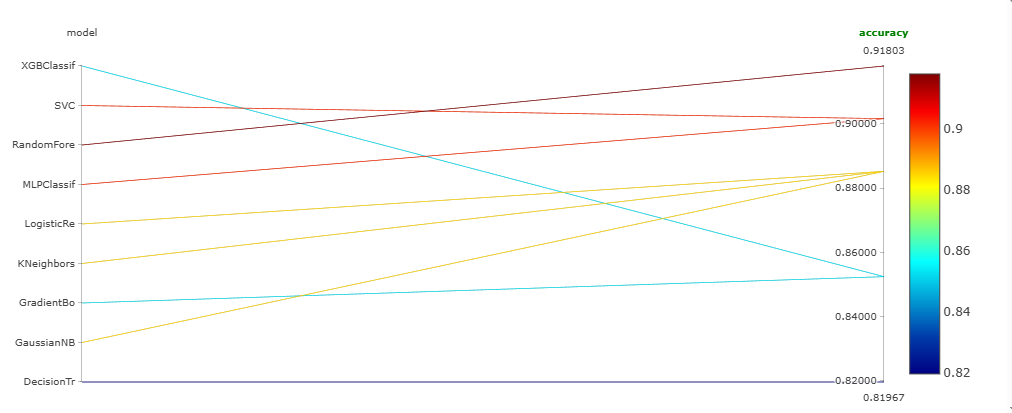

In [112]:
from IPython.display import Image

after_feature = "E:/python projects/assigment1 PAI ss/Heart/acc_9_models_heart.png"
Image(after_feature)

roc

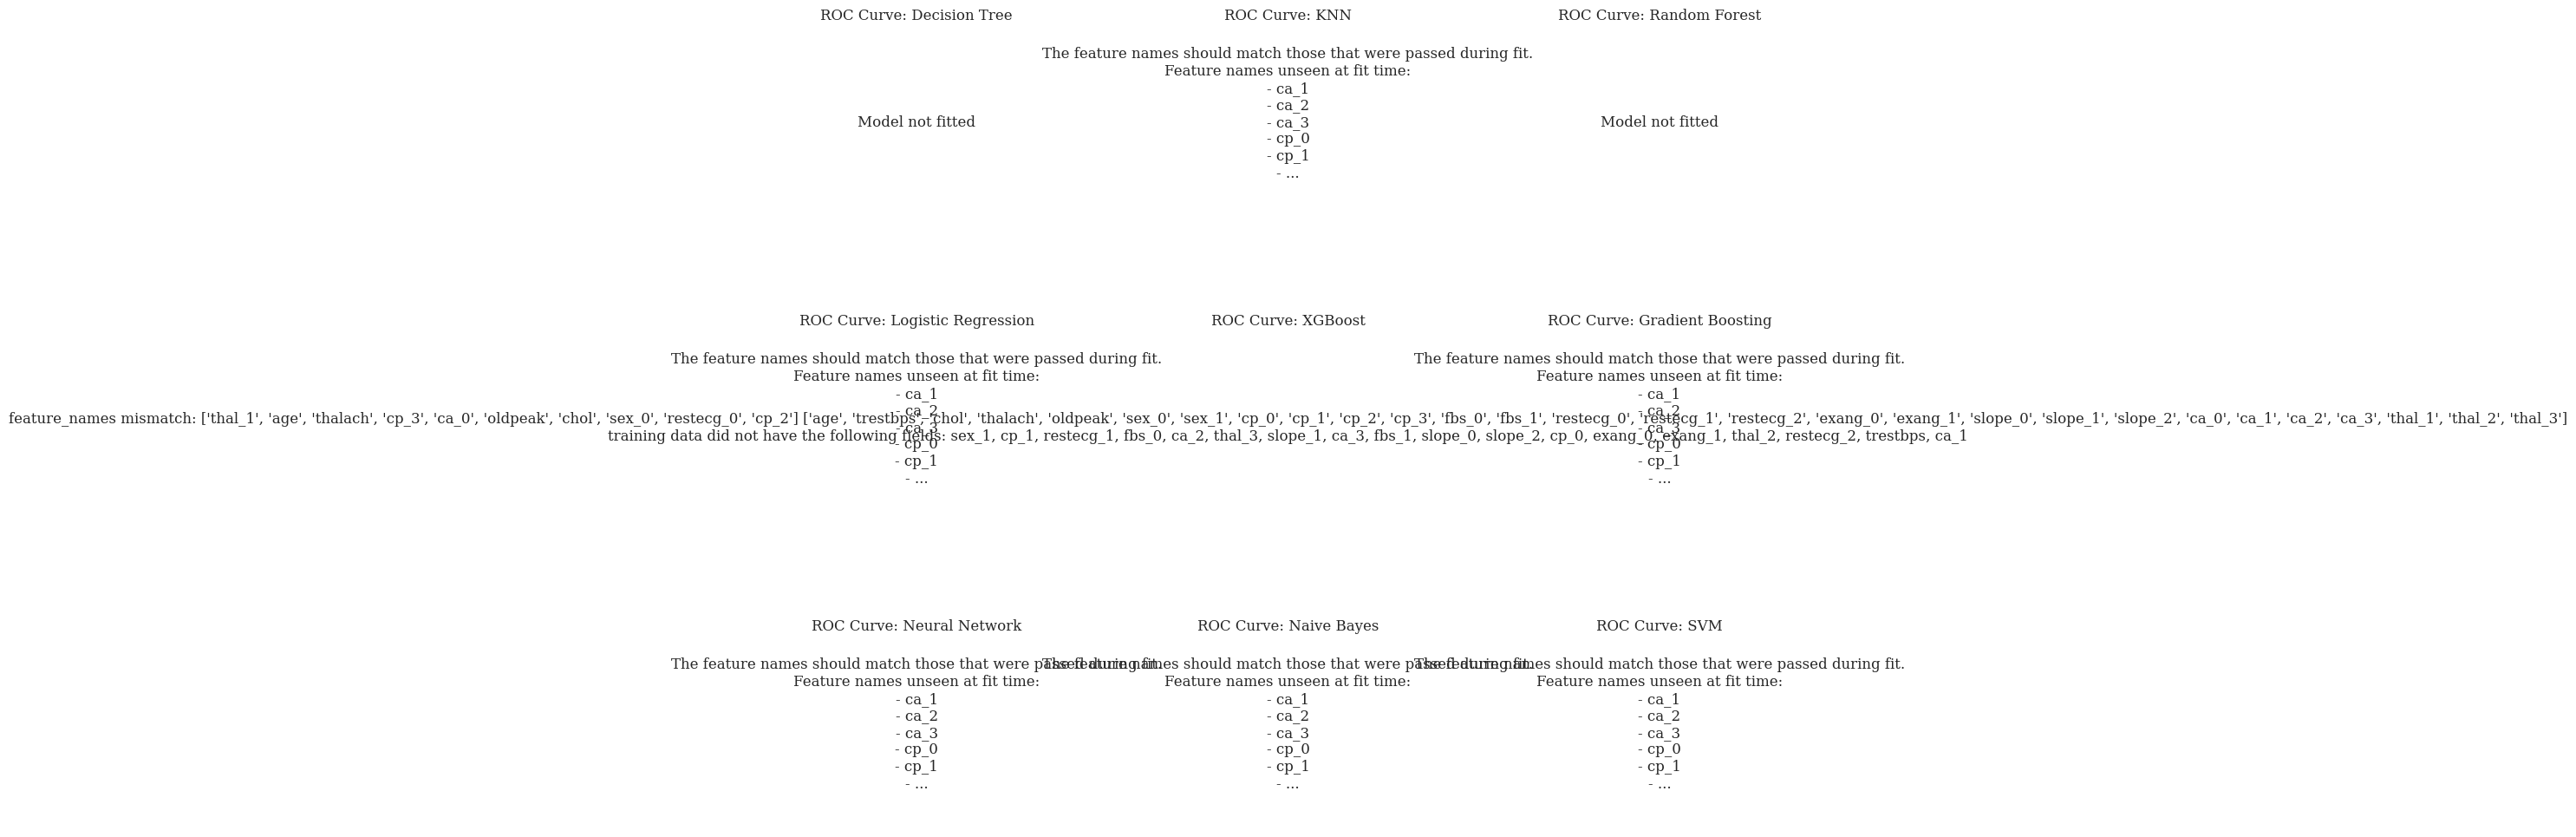

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.exceptions import NotFittedError

models = {
    'Decision Tree': dt_model,
    'KNN': knn_model,
    'Random Forest': rf_model,
    'Logistic Regression': lr_model,
    'XGBoost': xgb_model,
    'Gradient Boosting': gbt_model,
    'Neural Network': nn_model,
    'Naive Bayes': nb_model,
    'SVM': svm_model
}

n_models = len(models)
cols = 3
rows = (n_models + cols - 1) // cols

plt.figure(figsize=(5*cols, 4*rows))

for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(rows, cols, i)
    try:
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):
            y_score = model.decision_function(X_test)
        else:
            raise AttributeError("Model has no method to get scores for ROC curve")

        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.title(f'ROC Curve: {name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
    except NotFittedError:
        plt.text(0.5, 0.5, 'Model not fitted', ha='center', va='center')
        plt.title(f'ROC Curve: {name}')
        plt.axis('off')
    except Exception as e:
        plt.text(0.5, 0.5, str(e), ha='center', va='center')
        plt.title(f'ROC Curve: {name}')
        plt.axis('off')

# Add more space between subplots
plt.tight_layout(pad=3.0)  
# Or use plt.subplots_adjust if you want even more control
# plt.subplots_adjust(wspace=0.4, hspace=0.6)

plt.show()


8 fold

Random Forest acc: 0.8416
Random Forest Overall Error Rate (8-fold CV): 0.1584
Decision Tree acc: 0.7395
Decision Tree Overall Error Rate (8-fold CV): 0.2605
SVM acc: 0.8186
SVM Overall Error Rate (8-fold CV): 0.1814


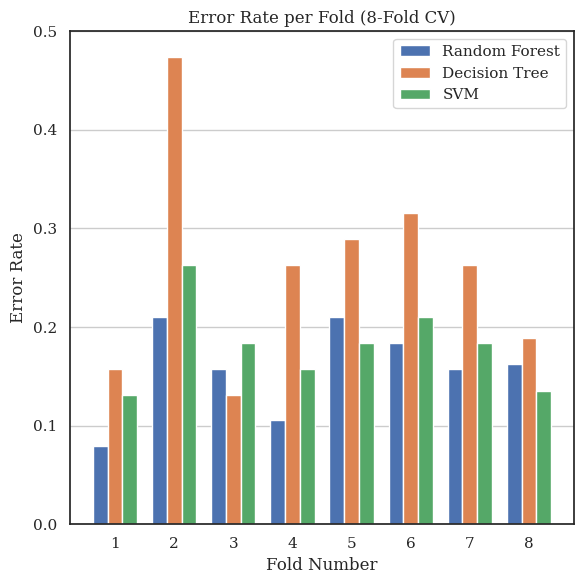

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


kf = KFold(n_splits=8, shuffle=True, random_state=42)

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(kernel='linear', probability=True, random_state=42)  # probability=True for predict_proba
}

# Dictionary to store error rates per model
error_rates = {name: [] for name in models.keys()}

for train_index, test_index in kf.split(X):
    # Using .iloc to select rows by integer position
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        error_rate = 1 - acc
        error_rates[name].append(error_rate)

# Calculating and printing average error rate per model
for name in models.keys():
    avg_error = np.mean(error_rates[name])
    avg_acc = np.mean(1 - np.array(error_rates[name]))

    print(f"{name} acc: {avg_acc:.4f}")
    print(f"{name} Overall Error Rate (8-fold CV): {avg_error:.4f}")


folds = np.arange(1, 9)  # Fold numbers 1 to 8
bar_width = 0.25
x = np.arange(len(folds))

plt.figure(figsize=(6, 6))

# Plotting each model's error bars with offset
for i, (name, errors) in enumerate(error_rates.items()):
    plt.bar(x + i * bar_width, errors, width=bar_width, label=name)

plt.xlabel("Fold Number")
plt.ylabel("Error Rate")
plt.title("Error Rate per Fold (8-Fold CV)")
plt.xticks(x + bar_width, folds)
plt.ylim(0, 0.5)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [151]:
for name in models.keys():
    avg_error = np.mean(error_rates[name])
    avg_acc = 1 - avg_error

    print(f"{name} acc: {avg_acc:.4f}")
    print(f"{name} Overall Error Rate (8-fold CV): {avg_error:.4f}")

    with mlflow.start_run(run_name=f"{name}_8FoldCV_Heart"):
        mlflow.log_param("model", name)
        mlflow.log_param("cv_folds", 8)
        mlflow.log_metric("avg_accuracy", avg_acc)
        mlflow.log_metric("avg_error_rate", avg_error)
        mlflow.sklearn.log_model(models[name], f"{name}_model")

Random Forest acc: 0.8416
Random Forest Overall Error Rate (8-fold CV): 0.1584


2025/05/26 05:15:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Random Forest_8FoldCV_Heart at: http://127.0.0.1:5000/#/experiments/256672308936108572/runs/50e46dd309bc4e7b9ecac93757b791d1
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/256672308936108572
Decision Tree acc: 0.7395
Decision Tree Overall Error Rate (8-fold CV): 0.2605


2025/05/26 05:15:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Decision Tree_8FoldCV_Heart at: http://127.0.0.1:5000/#/experiments/256672308936108572/runs/5e6fdada833543c5bfcfe23180af2193
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/256672308936108572
SVM acc: 0.8186
SVM Overall Error Rate (8-fold CV): 0.1814


2025/05/26 05:15:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run SVM_8FoldCV_Heart at: http://127.0.0.1:5000/#/experiments/256672308936108572/runs/65cf3012513c41cda23c5b4542c03274
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/256672308936108572


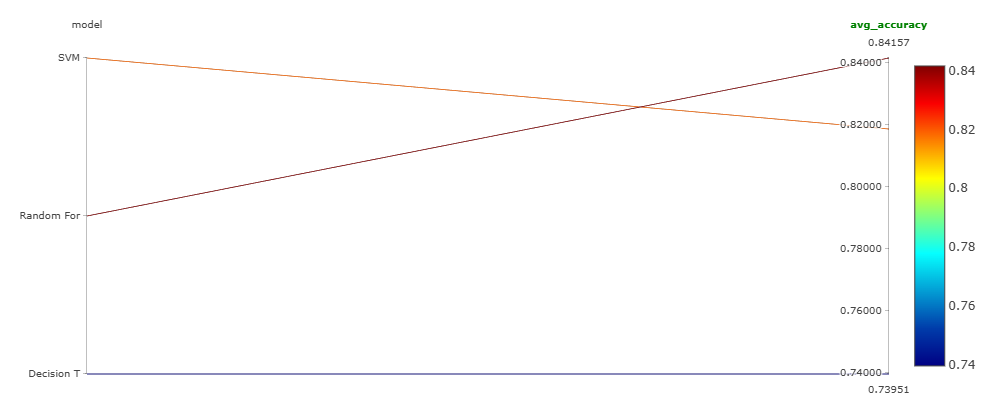

In [114]:
from IPython.display import Image

Fold8 = "E:/python projects/assigment1 PAI ss/Heart/8fold.png"
Image(Fold8)

C:\Users\user\AppData\Local\Temp\ipykernel_272\3046429049.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")


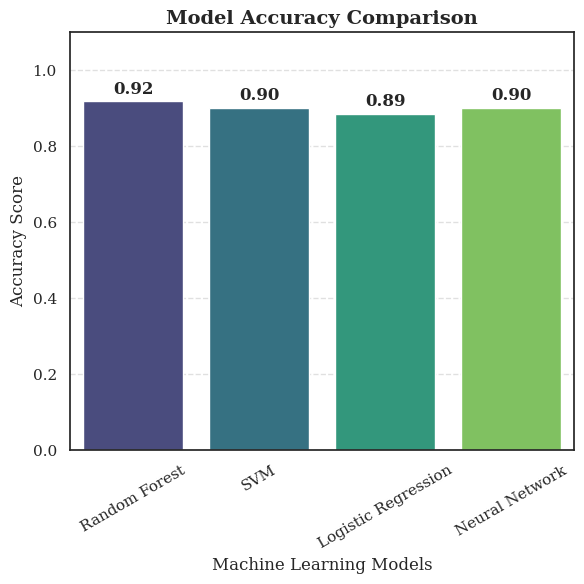

C:\Users\user\AppData\Local\Temp\ipykernel_272\3046429049.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(f1_results.keys()), y=list(f1_results.values()), palette="viridis")


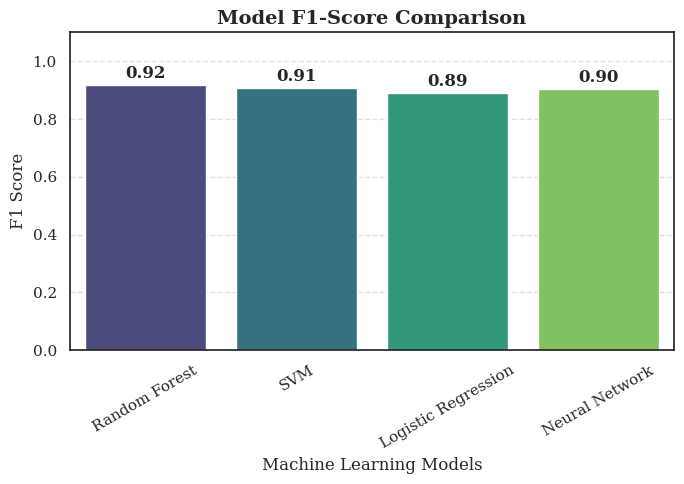

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy and F1 scores
results = {
    'Random Forest': acc_rf,
    'SVM': acc_svm,
    'Logistic Regression': acc_lr, 
    'Neural Network': acc_nn
}

f1_results = {
    'Random Forest': f1_rf,
    'SVM': f1_svm,
    'Logistic Regression': f1_lr,
    'Neural Network': f1_nn

}

# Plot Accuracy
plt.figure(figsize=(6, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")

# Add value labels on bars
for i, (model, acc) in enumerate(results.items()):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', va='bottom', fontweight='bold')

plt.title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy Score', fontsize=12)
plt.xlabel('Machine Learning Models', fontsize=12)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Plot F1 Score
plt.figure(figsize=(7, 5))
sns.barplot(x=list(f1_results.keys()), y=list(f1_results.values()), palette="viridis")

# Add value labels on bars
for i, (model, f1) in enumerate(f1_results.items()):
    plt.text(i, f1 + 0.01, f"{f1:.2f}", ha='center', va='bottom', fontweight='bold')

plt.title('Model F1-Score Comparison', fontsize=14, fontweight='bold')
plt.ylabel('F1 Score', fontsize=12)
plt.xlabel('Machine Learning Models', fontsize=12)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


# **Hybrid RF and LR**

In [ ]:

print("Logistic Regression Accuracy:", acc_lr)
print("Random Forest Accuracy:", acc_rf)

# Combining into hybrid model
voting_clf = VotingClassifier(
    estimators=[
        ('lr', lr_model),
        ('rf', rf_model)
    ],
    voting='hard'  
)

voting_clf.fit(X_train, y_train)
voting_pred = voting_clf.predict(X_test)
print("\nHybrid (Logistic Regression + RF) Accuracy:", accuracy_score(y_test, voting_pred))
print("\nError Rate:", 1 - accuracy_score(y_test, voting_pred))
print("\nconfusion Matrix:\n" , confusion_matrix(y_test, voting_pred))
print("\nClassification Report:\n", classification_report(y_test, voting_pred))

Logistic Regression Accuracy: 0.8852459016393442
Random Forest Accuracy: 0.9180327868852459

Hybrid (Logistic Regression + RF) Accuracy: 0.918918918918919

Error Rate: 0.08108108108108103

confusion Matrix:
 [[20  1]
 [ 2 14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.93      0.88      0.90        16

    accuracy                           0.92        37
   macro avg       0.92      0.91      0.92        37
weighted avg       0.92      0.92      0.92        37



In [ ]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")  # Set your MLflow tracking server
mlflow.set_experiment("Hybrid_LR_RF_VotingClassifier_Heart")
with mlflow.start_run(run_name="Hybrid_LR_RF_VotingClassifier_Heart"):

  
    # Metrics
    acc = accuracy_score(y_test, voting_pred)
    err = 1 - acc
    conf_mat = confusion_matrix(y_test, voting_pred)
    class_rep = classification_report(y_test, voting_pred, output_dict=True)

    # Log metrics
    mlflow.log_metric("Hybrid_Accuracy", acc)
    mlflow.log_metric("Hybrid_Error_Rate", err)
    
    # Log classification report values separately (precision, recall, f1 for class 0 & 1)
    mlflow.log_metric("F1_score_class_0", class_rep['0']['f1-score'])
    mlflow.log_metric("F1_score_class_1", class_rep['1']['f1-score'])
    mlflow.log_metric("Precision_class_1", class_rep['1']['precision'])
    mlflow.log_metric("Recall_class_1", class_rep['1']['recall'])

    # Log model
    mlflow.sklearn.log_model(voting_clf, "voting_model_Heart")

2025/05/26 03:25:24 INFO mlflow.tracking.fluent: Experiment with name 'Hybrid_LR_RF_VotingClassifier_Heart' does not exist. Creating a new experiment.
2025/05/26 03:25:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Hybrid_LR_RF_VotingClassifier_Heart at: http://127.0.0.1:5000/#/experiments/256672308936108572/runs/0acab20485a242d788fcff263be03f1d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/256672308936108572


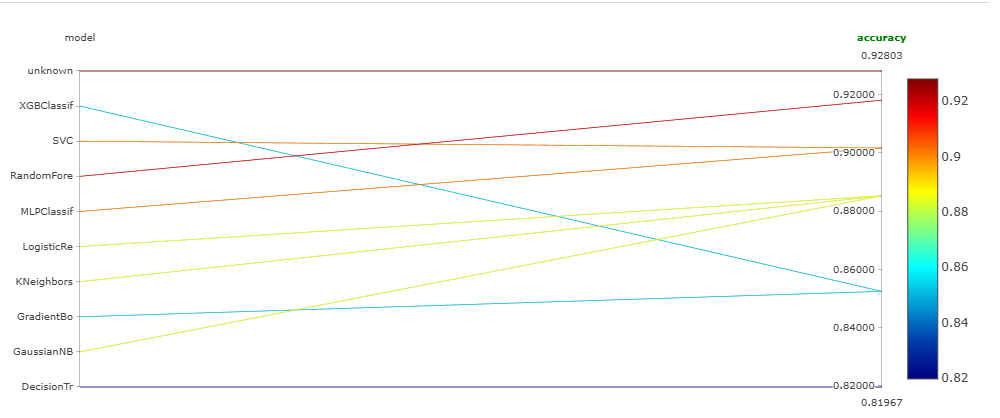

In [115]:
from IPython.display import Image

HRFLR = "E:/python projects/assigment1 PAI ss/Heart/acc_with_HRFLR.png"
Image(HRFLR)

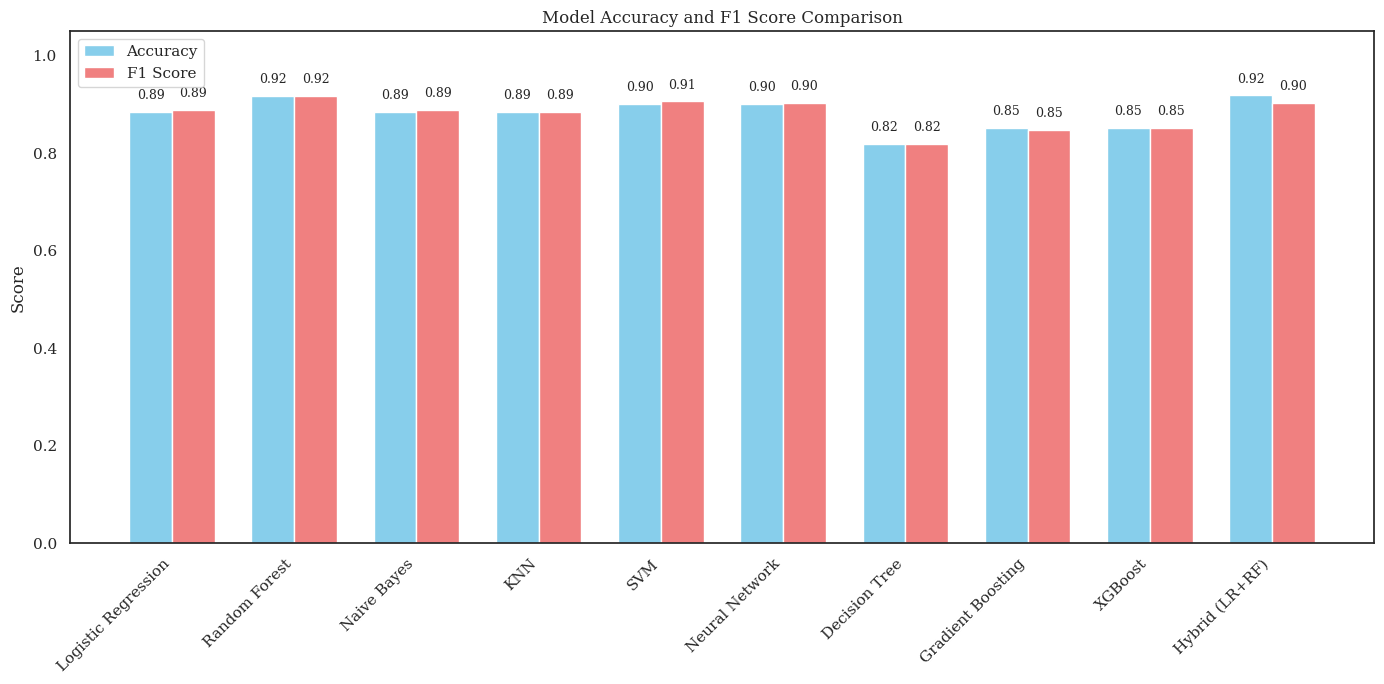

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
model_names = [
    "Logistic Regression", "Random Forest", "Naive Bayes", "KNN", "SVM",
    "Neural Network", "Decision Tree", "Gradient Boosting", "XGBoost", "Hybrid (LR+RF)"
]

# Accuracy scores 
accuracies = [
    acc_lr, acc_rf, acc_nb, acc_knn, acc_svm,
    acc_nn, acc_dt, acc_gbt, acc_xgb, acc_voting
]

# F1 scores 
f1_scores = [
    f1_lr, f1_rf, f1_nb, f1_knn, f1_svm,
    f1_nn, f1_dt, f1_gbt, f1_xgb, f1_voting
]

# Bar width and x locations
bar_width = 0.35
x = np.arange(len(model_names))

plt.figure(figsize=(14, 7))

# Plot Accuracy bars
acc_bars = plt.bar(x - bar_width/2, accuracies, bar_width, label='Accuracy', color='skyblue')

# Plot F1 Score bars
f1_bars = plt.bar(x + bar_width/2, f1_scores, bar_width, label='F1 Score', color='lightcoral')

plt.xticks(x, model_names, rotation=45, ha='right')
plt.ylim(0, 1.05)
plt.ylabel('Score')
plt.title('Model Accuracy and F1 Score Comparison')
plt.legend()

# Add value labels on top of bars for accuracy
for bar in acc_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.2f}', ha='center', va='bottom', fontsize=9)

# Add value labels on top of bars for f1 score
for bar in f1_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()
